## 実験概要
DCSGDにおけるノイズの強度について変化させながら分割数ごとの過剰期待損失、そのステップごとの推移を確認する。

ノイズの種類
- 対数正規分布
- 正規分布

ノイズについて
- 平均は０
- 分散
    - 2.2
    - 1.75




In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime


from ML2_lib import DC_SGD
from ML2_lib import loss
from ML2_lib import plot_set


In [2]:



# 学習率は0.01/t * sqrt(d) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 10000
c = 5
noise = "normal"
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

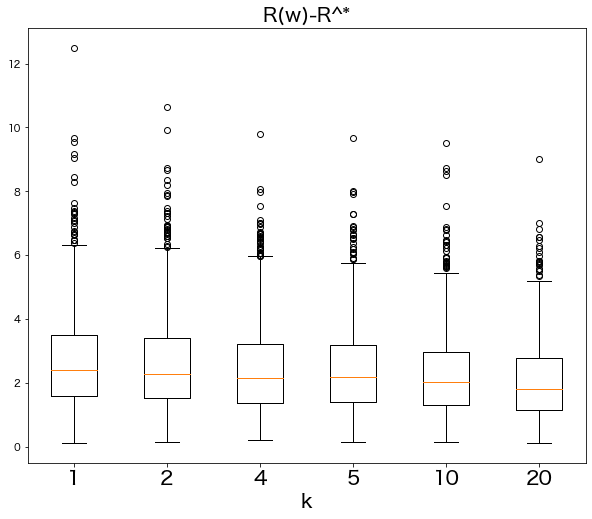

In [3]:
trail_num  = 1000
_, result_loss_gauss = DC.many_trails(trial_num=1000,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
k_list = [0,1,3,4,9,19]
title = f"noise type = {noise} Error variable = {E_var}"
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [5]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trail_num}_E_var{E_var}.csv")

In [6]:
noise = "lognormal"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

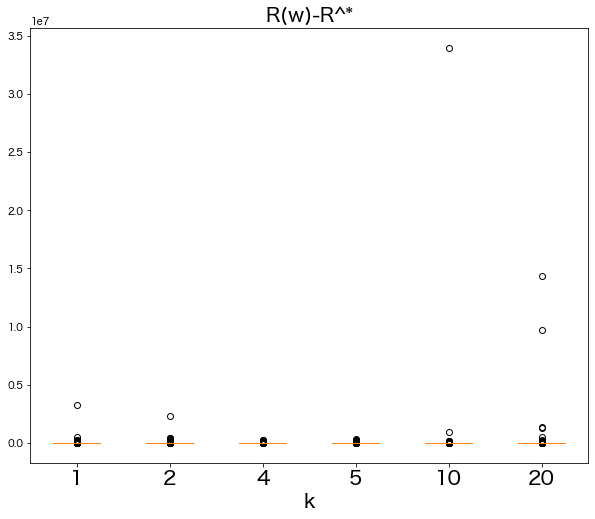

In [7]:
trail_num  = 1000
_, result_loss_lognormal = DC.many_trails(trial_num=1000,max_k=20)


In [8]:
df = pd.DataFrame(result_loss_lognormal)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_normal_trial_num_{trail_num}_E_var{E_var}.csv")

In [9]:

noise = "lognormal"
E_var = 1.75
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

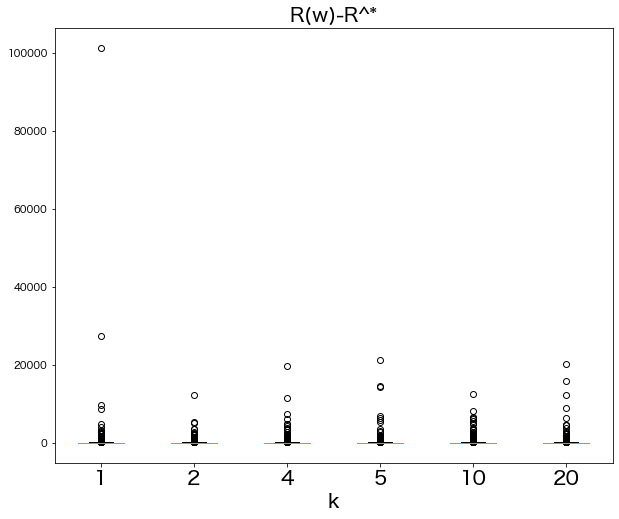

In [10]:
trail_num  = 1000
_, result_loss_lognormal = DC.many_trails(trial_num=1000,max_k=20)

plot_set.box_plot_k(result=result_loss_lognormal,k_string=columns,k_list=k_list,title=title)

In [11]:
df = pd.DataFrame(result_loss_lognormal)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_normal_trial_num_{trail_num}_E_var{E_var}.csv")

In [12]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,302.928830,153.092117,140.231689,193.675870,199.186013,230.565781,140.759043,195.110069,228.836541,198.991018,298.298971,243.678353,242.893906,218.500045,294.278273,273.395321,225.607747,211.642254,299.250136,230.543454
std,3357.146823,545.076080,329.709155,874.650643,1036.444356,1431.960443,456.818290,918.942425,1154.326969,722.778714,2588.470805,1874.138436,1565.180538,1072.833533,1514.444511,1934.218805,949.976930,723.936183,1641.454131,1043.832187
min,2.110668,1.666593,2.139296,1.799167,1.950947,0.807187,1.058571,1.643457,1.500868,1.250203,0.980350,0.758032,0.782655,1.044591,0.376790,1.416001,1.383272,1.131356,1.085109,1.173771
25%,18.962085,17.786915,19.582663,19.316009,21.446834,20.038094,20.316373,19.392212,19.905552,21.172499,21.868579,20.359629,22.080250,21.765548,22.306061,22.081528,23.072612,22.414721,24.106198,21.787645
50%,43.071481,43.729058,45.900208,45.568974,45.593150,45.924368,44.179231,41.657754,46.204524,47.531722,47.411255,47.187711,51.596274,49.773989,56.665130,51.915447,54.027443,54.796204,55.460259,54.389214
75%,121.225466,104.877217,109.496473,117.784816,113.280396,113.475037,105.026702,108.116473,128.446500,118.646190,126.911634,123.569501,125.192453,122.339576,142.234903,136.885730,134.615712,143.793073,142.458216,127.594061
max,101239.195194,12208.347008,4496.588957,19686.891125,21238.423795,35570.664776,10190.553542,20866.948824,27615.379763,12466.347293,74278.493206,55536.232409,35323.438781,27651.086185,29013.954725,45251.149282,17786.807272,12194.420029,40962.115669,20303.703014


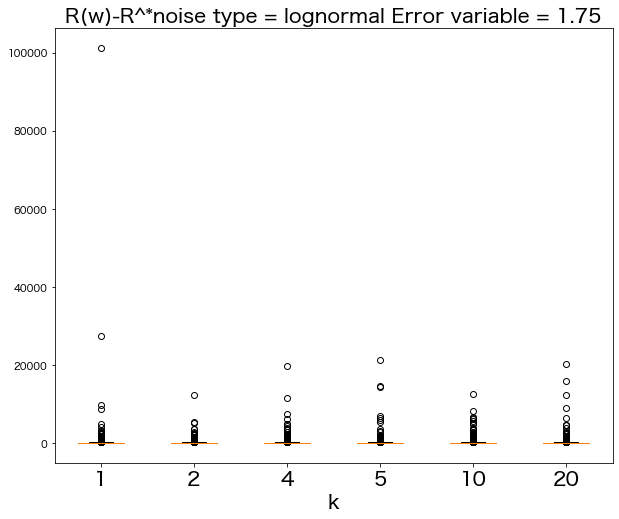

In [15]:

title = f"noise type = {noise} Error variable = {E_var}"
plot_set.box_plot_k(result=result_loss_lognormal,k_string=columns,k_list=k_list,title=title)

  0%|          | 0/1000 [00:00<?, ?it/s]

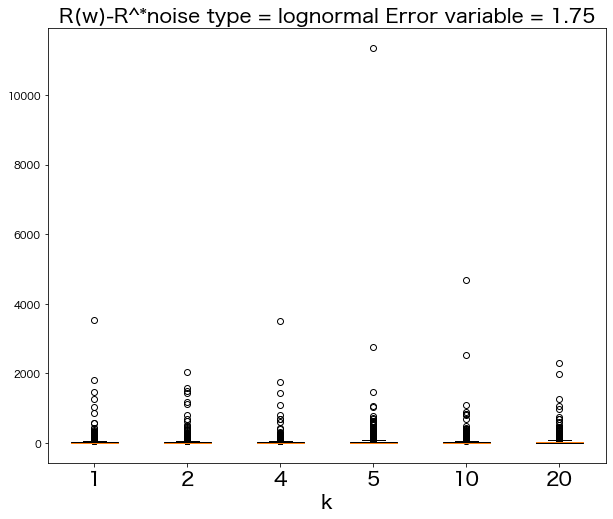

In [16]:

noise = "lognormal"
E_var = 1.5
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)

trail_num  = 1000
_, result_loss_lognormal = DC.many_trails(trial_num=1000,max_k=20)

plot_set.box_plot_k(result=result_loss_lognormal,k_string=columns,k_list=k_list,title=title)

In [ ]:
df = pd.DataFrame(result_loss_lognormal)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_normal_trial_num_{trail_num}_E_var{E_var}.csv")

In [17]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,302.928830,153.092117,140.231689,193.675870,199.186013,230.565781,140.759043,195.110069,228.836541,198.991018,298.298971,243.678353,242.893906,218.500045,294.278273,273.395321,225.607747,211.642254,299.250136,230.543454
std,3357.146823,545.076080,329.709155,874.650643,1036.444356,1431.960443,456.818290,918.942425,1154.326969,722.778714,2588.470805,1874.138436,1565.180538,1072.833533,1514.444511,1934.218805,949.976930,723.936183,1641.454131,1043.832187
min,2.110668,1.666593,2.139296,1.799167,1.950947,0.807187,1.058571,1.643457,1.500868,1.250203,0.980350,0.758032,0.782655,1.044591,0.376790,1.416001,1.383272,1.131356,1.085109,1.173771
25%,18.962085,17.786915,19.582663,19.316009,21.446834,20.038094,20.316373,19.392212,19.905552,21.172499,21.868579,20.359629,22.080250,21.765548,22.306061,22.081528,23.072612,22.414721,24.106198,21.787645
50%,43.071481,43.729058,45.900208,45.568974,45.593150,45.924368,44.179231,41.657754,46.204524,47.531722,47.411255,47.187711,51.596274,49.773989,56.665130,51.915447,54.027443,54.796204,55.460259,54.389214
75%,121.225466,104.877217,109.496473,117.784816,113.280396,113.475037,105.026702,108.116473,128.446500,118.646190,126.911634,123.569501,125.192453,122.339576,142.234903,136.885730,134.615712,143.793073,142.458216,127.594061
max,101239.195194,12208.347008,4496.588957,19686.891125,21238.423795,35570.664776,10190.553542,20866.948824,27615.379763,12466.347293,74278.493206,55536.232409,35323.438781,27651.086185,29013.954725,45251.149282,17786.807272,12194.420029,40962.115669,20303.703014
